## SVM - Michael Julian Peter

#### Import Library

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

#### Upload Dataset Heart Disease

In [ ]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### One Hot Encoding adalah proses di mana variabel kategorikal dikonversi menjadi bentuk yang dapat disediakan untuk algoritma Machine learning untuk lebih mudah di prediksi

In [ ]:
#cp
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [2])], 
    remainder='passthrough'                                         
)

X = ct.fit_transform(X)
X = X[:, 1:]
#restecg
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [8])], 
    remainder='passthrough'                                         
)

X = ct.fit_transform(X)
X = X[:, 1:]
#slope
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [13])], 
    remainder='passthrough'                                         
)

X = ct.fit_transform(X)
X = X[:, 1:]
#ca
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [15])], 
    remainder='passthrough'                                         
)

X = ct.fit_transform(X)
X = X[:, 1:]
#thal
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [19])], 
    remainder='passthrough'                                         
)

X = ct.fit_transform(X)
X = X[:, 1:]

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

#### Mendefinisikan fungsi Stratifiedkfold 5 Split

In [ ]:
skf = StratifiedKFold(n_splits=5)

#### Membuat fungsi untuk menghitung SVM (Accuracy, MSE, R Score, MAE, CV Score, Average precision-recall score

In [ ]:
def get_result(model, X_test, y_test, a):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    #hitung akurasi dkk
    mse = mean_squared_error(y_test,y_pred)
    r = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    cv = cross_val_score(model, X_test, y_test, cv=skf, scoring='accuracy')
    y_score = model.decision_function(X_test)
    average_precision = average_precision_score(y_test, y_score)

    #plotting
    disp = plot_precision_recall_curve(model, X_test, y_test)

    #print akurasi
    print("Support Vector Machine ", a)
    print("Accuracy = ", accuracy)
    print("Mean Squared Error:",mse)
    print("R score:",r)
    print("Mean Absolute Error:",mae)
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv)))
    print('Average precision-recall score: {0:0.2f}'.format(average_precision), "\n")
    disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

#### Kernel Function : Linear

Support Vector Machine  1
Accuracy =  0.8852459016393442
Mean Squared Error: 0.11475409836065574
R score: 0.5378787878787881
Mean Absolute Error: 0.11475409836065574
Cross-Validation Score : 78.462%
Average precision-recall score: 0.87 

Support Vector Machine  2
Accuracy =  0.8688524590163934
Mean Squared Error: 0.13114754098360656
R score: 0.471861471861472
Mean Absolute Error: 0.13114754098360656
Cross-Validation Score : 78.718%
Average precision-recall score: 0.96 

Support Vector Machine  3
Accuracy =  0.7540983606557377
Mean Squared Error: 0.2459016393442623
R score: 0.009740259740259938
Mean Absolute Error: 0.2459016393442623
Cross-Validation Score : 75.128%
Average precision-recall score: 0.89 

Support Vector Machine  4
Accuracy =  0.8166666666666667
Mean Squared Error: 0.18333333333333332
R score: 0.2592592592592592
Mean Absolute Error: 0.18333333333333332
Cross-Validation Score : 71.667%
Average precision-recall score: 0.92 

Support Vector Machine  5
Accuracy =  0.783333333

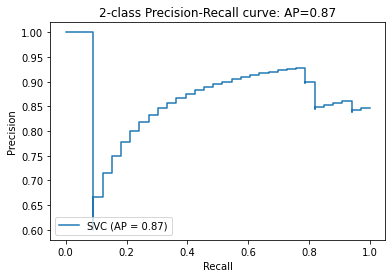

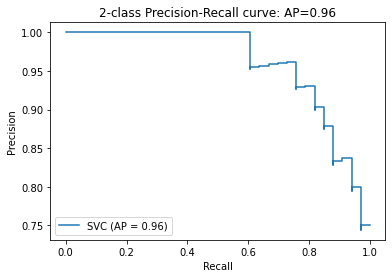

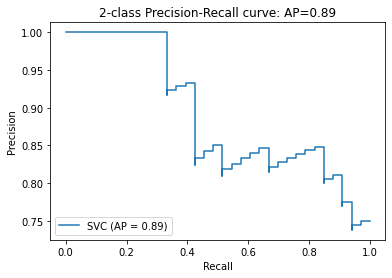

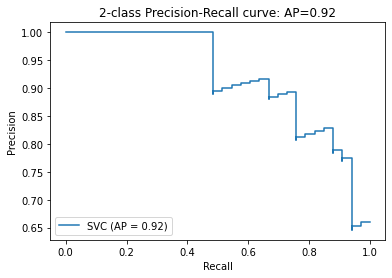

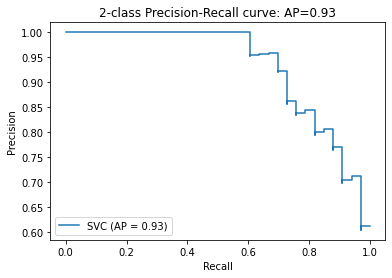

In [ ]:
model = SVC(kernel = 'linear', C = 1)
a=1
for train_index, test_index in skf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    get_result(model, X_test, y_test,a)
    a+=1

#### Kernel Function : Polynomial

Support Vector Machine  1
Accuracy =  0.8688524590163934
Mean Squared Error: 0.13114754098360656
R score: 0.471861471861472
Mean Absolute Error: 0.13114754098360656
Cross-Validation Score : 85.128%
Average precision-recall score: 0.89 

Support Vector Machine  2
Accuracy =  0.9344262295081968
Mean Squared Error: 0.06557377049180328
R score: 0.735930735930736
Mean Absolute Error: 0.06557377049180328
Cross-Validation Score : 80.256%
Average precision-recall score: 0.97 

Support Vector Machine  3
Accuracy =  0.7704918032786885
Mean Squared Error: 0.22950819672131148
R score: 0.07575757575757602
Mean Absolute Error: 0.22950819672131148
Cross-Validation Score : 70.385%
Average precision-recall score: 0.89 

Support Vector Machine  4
Accuracy =  0.8
Mean Squared Error: 0.2
R score: 0.19191919191919193
Mean Absolute Error: 0.2
Cross-Validation Score : 63.333%
Average precision-recall score: 0.94 

Support Vector Machine  5
Accuracy =  0.7666666666666667
Mean Squared Error: 0.2333333333333333

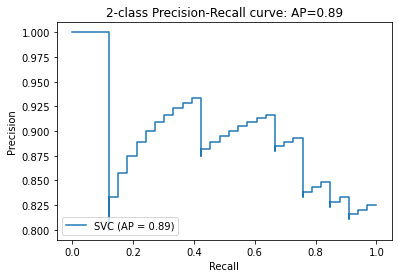

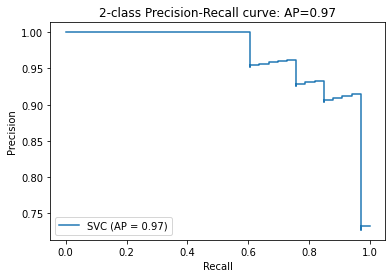

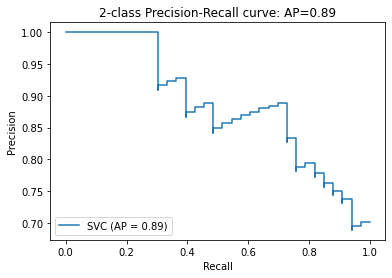

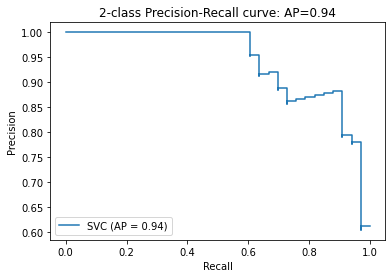

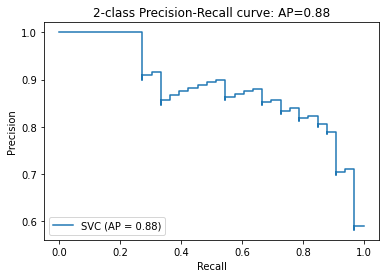

In [ ]:
model = SVC(kernel = 'poly', C = 1)
a=1
for train_index, test_index in skf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    get_result(model, X_test, y_test,a)
    a+=1


#### Kernel Function : rbf

Support Vector Machine  1
Accuracy =  0.819672131147541
Mean Squared Error: 0.18032786885245902
R score: 0.27380952380952395
Mean Absolute Error: 0.18032786885245902
Cross-Validation Score : 83.718%
Average precision-recall score: 0.84 

Support Vector Machine  2
Accuracy =  0.9180327868852459
Mean Squared Error: 0.08196721311475409
R score: 0.66991341991342
Mean Absolute Error: 0.08196721311475409
Cross-Validation Score : 85.385%
Average precision-recall score: 0.97 

Support Vector Machine  3
Accuracy =  0.8032786885245902
Mean Squared Error: 0.19672131147540983
R score: 0.20779220779220797
Mean Absolute Error: 0.19672131147540983
Cross-Validation Score : 81.923%
Average precision-recall score: 0.88 

Support Vector Machine  4
Accuracy =  0.8
Mean Squared Error: 0.2
R score: 0.19191919191919193
Mean Absolute Error: 0.2
Cross-Validation Score : 70.000%
Average precision-recall score: 0.94 

Support Vector Machine  5
Accuracy =  0.7666666666666667
Mean Squared Error: 0.2333333333333333

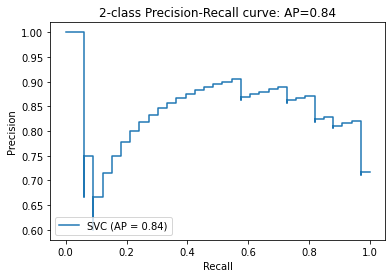

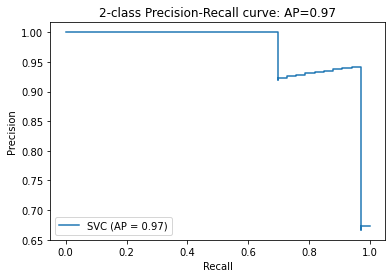

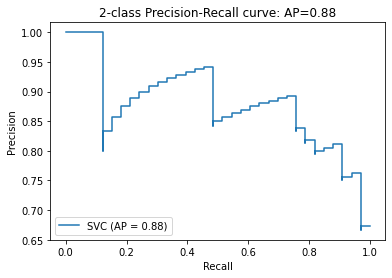

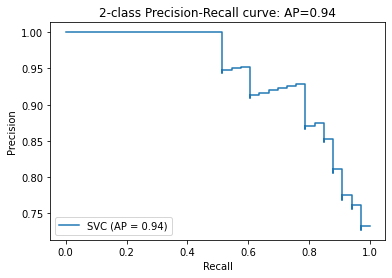

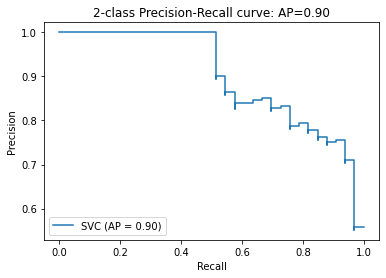

In [ ]:
model = SVC(kernel = 'rbf', C = 1)
a=1
for train_index, test_index in skf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    get_result(model, X_test, y_test,a)
    a+=1

#### Kernel Function : Sigmoid

Support Vector Machine  1
Accuracy =  0.8524590163934426
Mean Squared Error: 0.14754098360655737
R score: 0.405844155844156
Mean Absolute Error: 0.14754098360655737
Cross-Validation Score : 88.333%
Average precision-recall score: 0.87 

Support Vector Machine  2
Accuracy =  0.9180327868852459
Mean Squared Error: 0.08196721311475409
R score: 0.66991341991342
Mean Absolute Error: 0.08196721311475409
Cross-Validation Score : 82.051%
Average precision-recall score: 0.97 

Support Vector Machine  3
Accuracy =  0.7868852459016393
Mean Squared Error: 0.21311475409836064
R score: 0.141774891774892
Mean Absolute Error: 0.21311475409836064
Cross-Validation Score : 81.795%
Average precision-recall score: 0.89 

Support Vector Machine  4
Accuracy =  0.8333333333333334
Mean Squared Error: 0.16666666666666666
R score: 0.32659932659932656
Mean Absolute Error: 0.16666666666666666
Cross-Validation Score : 78.333%
Average precision-recall score: 0.92 

Support Vector Machine  5
Accuracy =  0.8
Mean Squa

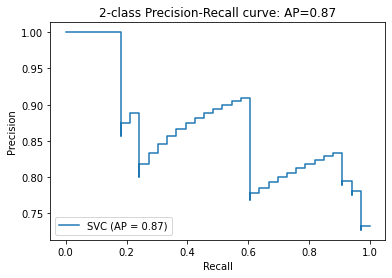

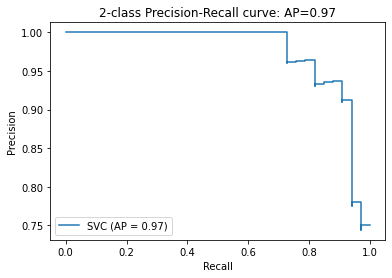

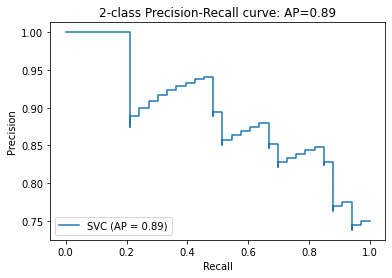

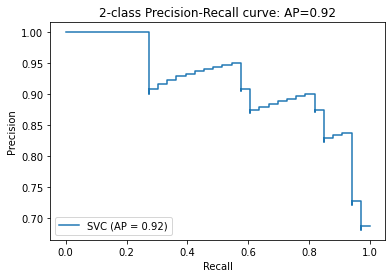

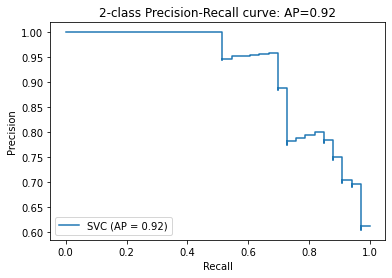

In [ ]:
model = SVC(kernel = 'sigmoid', C = 1)
a=1
for train_index, test_index in skf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    get_result(model, X_test, y_test, a)
    a+=1